In [1]:
import pandas as pd

In [2]:
df3 = pd.read_csv('Data_cleaned.csv')

In [3]:
del df3['Unnamed: 0']

In [4]:
X_vals = df3.drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])

In [5]:
Y_T = df3['TotalGHGEmissions']

### SEPARONS NOTRE DATASET EN DONNEES D'ENTRAINEMENT ET DONNEES DE TEST

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train_TotGHG, x_test_TotGHG, y_train_TotGHG, y_test_TotGHG = train_test_split(X_vals, Y_T, test_size = .2)

## REGRESSION Multiple

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
Regresseur = LinearRegression()

### STANDARDISATION DES DONNEES

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(x_train_TotGHG)
scaler.fit(x_test_TotGHG)

StandardScaler()

In [12]:
x_train_TotGHG, x_test_TotGHG = scaler.fit_transform(x_train_TotGHG), scaler.fit_transform(x_test_TotGHG)

In [13]:
# Construction du modèle
regressor_amel = LinearRegression()

In [14]:
# J'adapte le modèle de regression linéaire à l'ensemble de données d'apprentissage.
regressor_amel.fit(x_train_TotGHG, y_train_TotGHG)

LinearRegression()

In [15]:
# Faire de nouvelles prédictions
y_pred1 = regressor_amel.predict(x_test_TotGHG)


In [25]:
#================ VERIFIONS L'EXACTITUDE =====================

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

In [25]:


# Note : r2_score() nous donnes aussi une precision sur la prediction

print('R2_Score : ', r2_score(y_test_TotGHG, y_pred1).round(4)*100, '%')

# un bon modele doit avoir un RMSE < 180
print("\nRMSE : {:.2f}".format(np.sqrt(mean_squared_error(y_test_TotGHG, y_pred1) )))



R2_Score :  87.9 %

RMSE : 193.16


## RIDGE

In [16]:
from sklearn import kernel_ridge

In [ ]:
#x_train_TotGHG, x_test_TotGHG, y_train_TotGHG, y_test_TotGHG

In [17]:
predicteur = kernel_ridge.KernelRidge()

In [18]:
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(x_train_TotGHG, y_train_TotGHG)

KernelRidge()

In [19]:
# prédire sur le jeu de test
y_test_pred_ridge = predicteur.predict(x_test_TotGHG)


In [31]:
# calculer la RMSE sur le jeu de test
rmse = np.sqrt(mean_squared_error(y_test_TotGHG, y_test_pred_ridge))
print("RMSE: {:.2f}".format(rmse))

print('R2_score : ', r2_score(y_test_TotGHG, y_test_pred_ridge).round(4)*100, '%')

RMSE: 226.69
R2_score :  83.33 %


Appliquons un GridsearchCV afin d'améliorer les performances de notre modele

In [24]:
from sklearn.model_selection import GridSearchCV

In [35]:
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# valeurs du paramètre kernel
ker = ['rbf', 'linear', 'poly']
# grille de paramètres
param_grid = {'kernel':ker, 'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred = GridSearchCV(
        kernel_ridge.KernelRidge(),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(x_train_TotGHG, y_train_TotGHG)



C:\Users\Zakaria\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.17975e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zakaria\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.02864e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zakaria\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.92364e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zakaria\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.16212e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
C:\Users\Zakaria\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.56155e-19): 

GridSearchCV(cv=5, estimator=KernelRidge(),
             param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ]),
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='neg_mean_squared_error')

In [38]:
# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(x_test_TotGHG)

In [40]:
# afficher les paramètres optimaux
print("les paramètres optimaux sont : {}".format(grid_pred.best_params_))

les paramètres optimaux sont : {'alpha': 1.0, 'gamma': 0.1, 'kernel': 'poly'}


In [39]:
print('RMSE : ', np.sqrt(mean_squared_error(y_test_TotGHG, y_test_pred_cv)))
print('R2_score : ', r2_score(y_test_TotGHG, y_test_pred_cv).round(4)*100, '%')

RMSE :  194.68532362406333
R2_score :  87.71 %


## XGBOOST

In [20]:
import xgboost as xgb

In [30]:
X_S = df3.drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])
Y_T = df3['SiteEnergyUse(kBtu)']

In [32]:
x_train_TotGHG, x_test_TotGHG, y_train_TotGHG, y_test_TotGHG = train_test_split(X_S, Y_T, test_size = .2)

scaler = StandardScaler()
scaler.fit(x_train_TotGHG)
scaler.fit(x_test_TotGHG)



StandardScaler()

In [ ]:
#x_train_TotGHG, x_test_TotGHG, y_train_TotGHG, y_test_TotGHG

In [33]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 10,
                          alpha = 10,
                          n_estimators = 200)

In [34]:
xg_reg.fit(x_train_TotGHG,y_train_TotGHG)

preds = xg_reg.predict(x_test_TotGHG)

[22:37:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [46]:
rmse = np.sqrt(mean_squared_error(y_test_TotGHG, preds))
print("RMSE: %f" % (rmse))
print('R2_score : ', r2_score(y_test_TotGHG, preds).round(4)*100, '%')

RMSE: 166.606766
R2_score :  91.0 %


Pas Mal du tout :)

Appliquons toutefois une CV pour d'éventuel meileures performances

In [47]:
data_dmatrix = xgb.DMatrix(data=x_train_TotGHG,label=y_train_TotGHG)

In [49]:
params = {"objective":"reg:linear",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 10,
          'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix,
                    params=params,
                    nfold=3,
                    num_boost_round=200,
                    early_stopping_rounds=10,
                    metrics="rmse",
                    as_pandas=True,
                    seed=123)

[00:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[00:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[00:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [50]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,437.880320,43.923726,439.676971,88.240421
1,404.134552,39.738472,412.948741,93.541918
2,376.642181,38.469028,393.336874,95.968690
3,350.920339,37.059631,379.562754,95.295405
4,325.568390,34.799826,359.597920,95.288689


In [51]:
print((cv_results["test-rmse-mean"]).tail(1))

199    177.159047
Name: test-rmse-mean, dtype: float64


In [27]:
import matplotlib.pyplot as plt

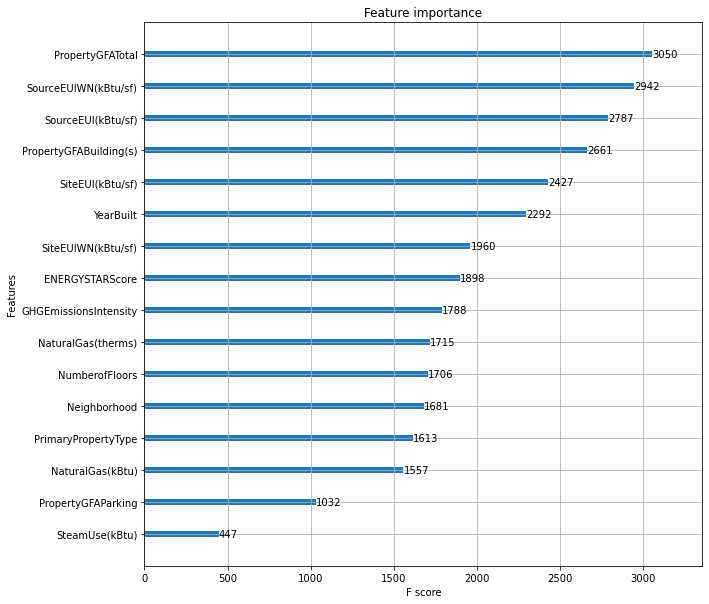

In [35]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()